In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualizing destributions

<Figure size 432x432 with 0 Axes>

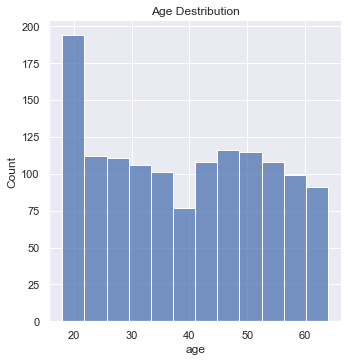

In [7]:
sns.set()
plt.figure( figsize = (6, 6) )
sns.displot(data['age'])
plt.title('Age Destribution')
plt.show()

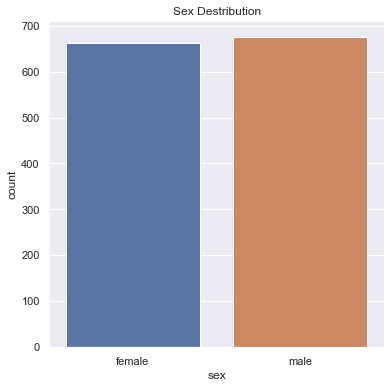

In [8]:
plt.figure(figsize = (6, 6))
sns.countplot( x='sex', data=data )
plt.title('Sex Destribution')
plt.show()

In [9]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

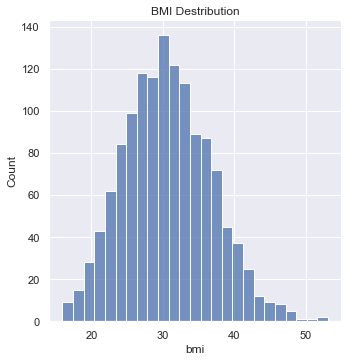

In [10]:
sns.set()
plt.figure( figsize = (6, 6) )
sns.displot(data['bmi'])
plt.title('BMI Destribution')
plt.show()

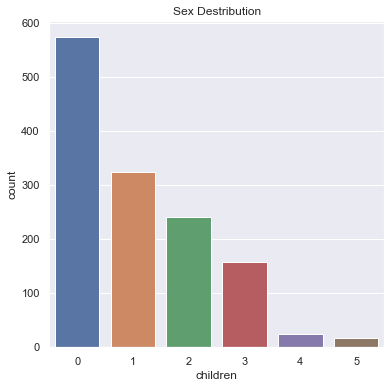

In [11]:
plt.figure(figsize = (6, 6))
sns.countplot( x='children', data=data )
plt.title('Sex Destribution')
plt.show()

In [12]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

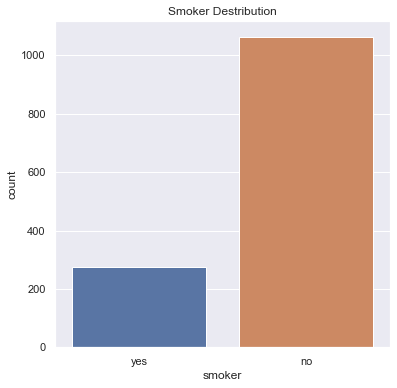

In [13]:
plt.figure(figsize = (6, 6))
sns.countplot( x='smoker', data=data )
plt.title('Smoker Destribution')
plt.show()

In [14]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

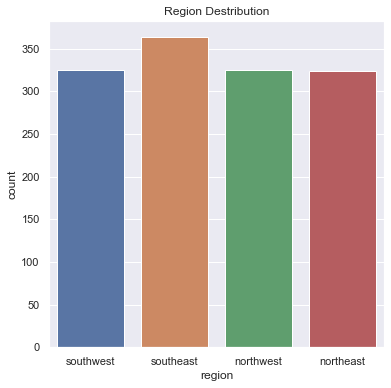

In [15]:
plt.figure(figsize = (6, 6))
sns.countplot( x='region', data=data )
plt.title('Region Destribution')
plt.show()

In [16]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

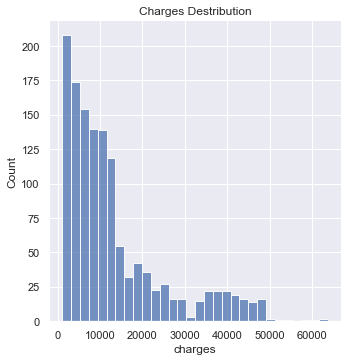

In [17]:
sns.set()
plt.figure( figsize = (6, 6) )
sns.displot(data['charges'])
plt.title('Charges Destribution')
plt.show()

# Encoding Categorical Features

In [18]:
data.replace( { 'sex': { 'male': 0, 'female': 1 } }, inplace = True )

data.replace( { 'smoker': { 'yes': 0, 'no': 1 } }, inplace = True )

data.replace( { 'region': { 'southwest': 1, 'southeast': 0, 'northeast': 2, 'northwest': 3} }, inplace = True )

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting the Features and the Targets

In [19]:
x = data.drop(columns = 'charges', axis = 1)
y = data['charges']

print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Train Test Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 2 )

print( x.shape, x_train.shape, x_test.shape )

(1338, 6) (1070, 6) (268, 6)


# Model Training

In [21]:
model = LinearRegression()

In [22]:
model.fit( x_train, y_train )

LinearRegression()

# Model Evaluation

In [23]:
training_data_prediction = model.predict( x_train )

r2_train = metrics.r2_score( y_train, training_data_prediction )

print("R Squared Error on Training Data : ", r2_train)

R Squared Error on Training Data :  0.751505643411174


In [24]:
test_data_prediction = model.predict( x_test )

r2_test = metrics.r2_score( y_test, test_data_prediction )

print("R Squared Error on Test Data : ", r2_test)

R Squared Error on Test Data :  0.7447273869684077


# Building a Predictive System

In [27]:
input_data = (31,1,25.74,0,1,0)

input_data = np.asarray(input_data)

input_data = input_data.reshape(1, -1)

prediction = model.predict(input_data)

print("USD : ", prediction[0])

USD :  3760.0805764960514
